C:\Users\2-13\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


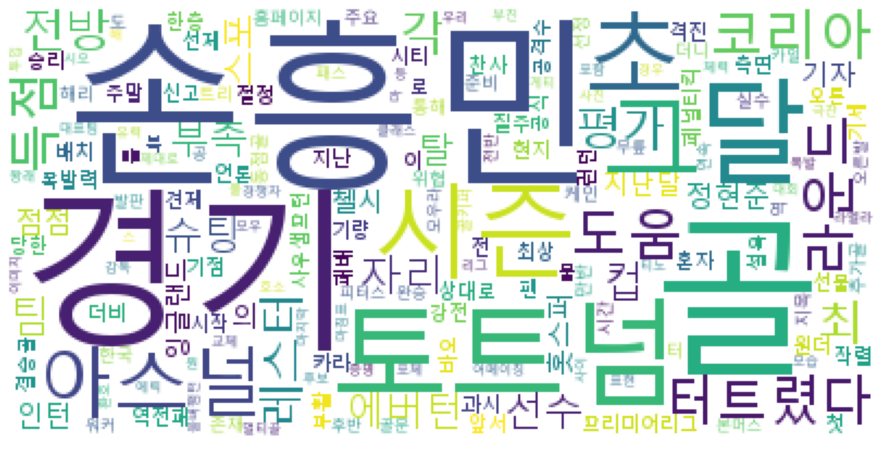

In [3]:
import requests # urllib 를 wrapper 해서 사용하기 편하게 만든 패키지
import nltk
from konlpy.tag import Twitter
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
res = requests.get('https://sports.v.daum.net/v/20181227140914322')
soup = BeautifulSoup(res.content,'html.parser') # 브라우저처럼 파싱후 계측정으로 표현
body = soup.select('.article_view')[0] # class css3
text = " ".join(p.get_text() for p in body.find_all('p')) # 태그가 표현하고자 하는 문자
t = Twitter()
tokens_ko = t.nouns(text) # 명사만 추출 (extraction)
ko = nltk.Text(tokens_ko, name= '스포츠') # text mining하는 도구 (챗봇도구 지원)
ko.vocab().most_common(10) # 가장 빈번하게 사용하는 단어 추출
data = ko.vocab().most_common(500)
#사전 형태로 데이터가 입력 
# 도수를 이용해서 워드 클라우드를 생성 
# stopwords ; 제거 
# nltk, gensim
stopwords = ['점점','지난','측면','기세','북']
tokens= [each_word for each_word in data if each_word not in stopwords]
tmp_data = dict(tokens)
# 도수를 이용해서 워드 클라우드를 생성
wordcloud = WordCloud(font_path='c://windows/Fonts/malgun.ttf',
                     relative_scaling=0.1,
                     background_color ='white',).generate_from_frequencies(tmp_data)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
                              

In [4]:
# 최근 기사를 검색후 원하는 주제에 대해 파싱 후 wordcloud

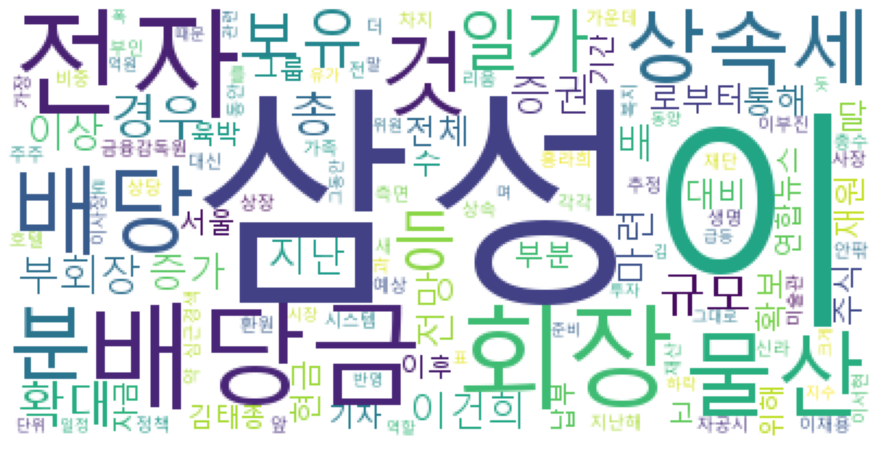

In [5]:
import requests # urllib 를 wrapper 해서 사용하기 편하게 만든 패키지
import nltk
from konlpy.tag import Twitter
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
res = requests.get('https://news.v.daum.net/v/20201027093208368')
soup = BeautifulSoup(res.content,'html.parser') # 브라우저처럼 파싱후 계측정으로 표현
body = soup.select('.article_view')[0] # class css3
text = " ".join(p.get_text() for p in body.find_all('p')) # 태그가 표현하고자 하는 문자
t = Twitter()
tokens_ko = t.nouns(text) # 명사만 추출 (extraction)
ko = nltk.Text(tokens_ko, name= '스포츠') # text mining하는 도구 (챗봇도구 지원)
ko.vocab().most_common(50) # 가장 빈번하게 사용하는 단어 추출
data = ko.vocab().most_common(500)
stopwords = ['이','것','과','로부터','폭','고']
tokens= [each_word for each_word in data if each_word not in stopwords]
tmp_data = dict(tokens)
# 도수를 이용해서 워드 클라우드를 생성
wordcloud = WordCloud(font_path='c://windows/Fonts/malgun.ttf',
                     relative_scaling=0.1,
                     background_color ='white',).generate_from_frequencies(tmp_data)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
                              

In [6]:
from time import time 
# text 전처리 
# DTM -> document term matrix 단어의 등장 도수 
from sklearn.feature_extraction.text import CountVectorizer  # 도수를 확인
from sklearn.decomposition import LatentDirichletAllocation # 주제에 나타날 단어 확률
# 주제 2개 : 확률이 높은 곳으로 분류 - 도수와 근접한 단어
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10 
n_top_words = 20 

def print_top_words(model, feature_names , n_top_words):
    # LDA에서 주제에 해당하는 단어에 대한 인덱스 
    for topic_idx , topic in enumerate(model.components_):
        message = 'Topic #%d: ' % topic_idx 
        message += " ".join([feature_names[i] for i in topic.argsort()[: -n_top_words -1:-1]])
        
        print(message)
    print()

# 기사의 본문만 다운
dataset = fetch_20newsgroups(shuffle = True, random_state = 1, remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples] # 각주제의 단어 2000개 까지만 추출
tf_vectorizer = CountVectorizer(max_df=0.95, min_df = 2 , 
                                max_features= n_features , stop_words='english') # df : document frequency
tf = tf_vectorizer.fit_transform(data_samples) # 1000개의 단어로 이루어진 DTM
# pca 주성분 분석 LDA 는 text 에서 특징 추출 
lda = LatentDirichletAllocation(n_components= n_components , max_iter =5 , 
                                learning_method ='online', learning_offset= 50. ,random_state=0)

lda.fit(tf) # 도수와 근접단어를 이용해서 TOPIC 분석을 실행 
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names , n_top_words)

Topic #0: edu com mail send graphics ftp pub available contact university list faq ca information cs 1993 program sun uk mit
Topic #1: don like just know think ve way use right good going make sure ll point got need really time doesn
Topic #2: christian think atheism faith pittsburgh new bible radio games alt lot just religion like book read play time subject believe
Topic #3: drive disk windows thanks use card drives hard version pc software file using scsi help does new dos controller 16
Topic #4: hiv health aids disease april medical care research 1993 light information study national service test led 10 page new drug
Topic #5: god people does just good don jesus say israel way life know true fact time law want believe make think
Topic #6: 55 10 11 18 15 team game 19 period play 23 12 13 flyers 20 25 22 17 24 16
Topic #7: car year just cars new engine like bike good oil insurance better tires 000 thing speed model brake driving performance
Topic #8: people said did just didn know ti

In [7]:
# 문제 : inverse document frequecy 로 변경해서 

In [8]:

from time import time 
# text 전처리 
# DTM -> document term matrix 단어의 등장 도수 
from sklearn.feature_extraction.text import TfidfVectorizer  # 도수를 확인
from sklearn.decomposition import LatentDirichletAllocation # 주제에 나타날 단어 확률
# 주제 2개 : 확률이 높은 곳으로 분류 - 도수와 근접한 단어
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10 
n_top_words = 20 

def print_top_words(model, feature_names , n_top_words):
    # LDA에서 주제에 해당하는 단어에 대한 인덱스 
    for topic_idx , topic in enumerate(model.components_):
        message = 'Topic #%d: ' % topic_idx 
        message += " ".join([feature_names[i] for i in topic.argsort()[: -n_top_words -1:-1]])
        
        print(message)
    print()

# 기사의 본문만 다운
dataset = fetch_20newsgroups(shuffle = True, random_state = 1, remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples] # 각주제의 단어 2000개 까지만 추출
tf_vectorizer = TfidfVectorizer(max_df=0.95, min_df = 2 , 
                                max_features= n_features , stop_words='english') # df : document frequency
tf = tf_vectorizer.fit_transform(data_samples) # 1000개의 단어로 이루어진 DTM
# pca 주성분 분석 LDA 는 text 에서 특징 추출 
lda = LatentDirichletAllocation(n_components= n_components , max_iter =5 , 
                                learning_method ='online', learning_offset= 50. ,random_state=0)

lda.fit(tf) # 도수와 근접단어를 이용해서 TOPIC 분석을 실행 
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names , n_top_words)

Topic #0: windows thanks file edu use drive software mail help does card pc know hi using need program problem looking window
Topic #1: dog attack head drive talking human maybe disk printer drivers window problem mac advance thanks use hard work ii windows
Topic #2: god accept read clock driving stuff nature port think error hard usually 60 computer faith know following limited peter control
Topic #3: pp 22 18 19 11 23 26 55 van 10 31 44 27 21 38 34 48 24 armenian 37
Topic #4: 2nd math ground value said leafs display long try lunar launch monitor space version shuttle luck computer door probe moon
Topic #5: cases 00 soon edu sale condition effective asking consider good general john stuff nhl card san cd deleted end hear
Topic #6: mike love graphics hear heard try state time looking good performance windows marriage os crime company parts program comp men
Topic #7: assume magi home order card right lot supposed hit better thing especially week record require use ground important cours

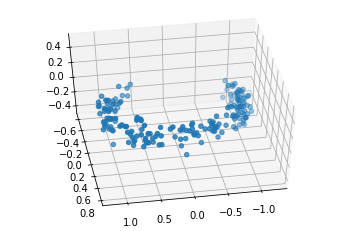

In [9]:
import tensorflow as tf

import numpy.random as rnd

import numpy as np

rnd.seed(4)

m = 200

w1, w2 = 0.1, 0.3

noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5

data = np.empty((m, 3))

# 3차원 데이터 생성

data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2

data[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2

data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(data[:100])

X_test = scaler.transform(data[100:])


%matplotlib inline

import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

ax.scatter3D(data[:, 0], data[:, 1], data[: , 2])

ax.view_init(azim=80, elev=50)

In [11]:
import tensorflow as tf 
tf.reset_default_graph()

n_inputs = 3 # 3차원
n_hidden = 2 # 2차원으로 차원축소
n_outputs = n_inputs # 입력과 출력 사이즈가 동일
learning_rate = 0.01
X = tf.placeholder(tf.float32, shape=[None,n_inputs]) # 100
hidden = tf.layers.dense(X,n_hidden) # 가중치 : 100x3   3x2    100x2
outputs = tf.layers.dense(X,n_outputs) # 100x2    2x3   100x3
# 재구축 : 생성패턴
# 입력과 출력의 차가 
reconstruction_loss = tf.reduce_mean(tf.square(outputs-X)) # cost function
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)
init = tf.global_variables_initializer()

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


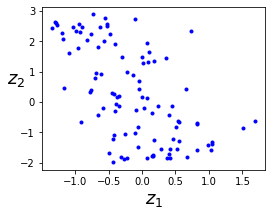

In [12]:
n_iterations = 1000
codings = hidden  # 차원축소한다 , 코딩한다(encoding(차원축소) - encoding(재구축))
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X:X_train})
    codings_val = codings.eval(feed_dict={X:X_test})
fig = plt.figure(figsize=(4,3))
# 차원축소 : 모양과 형태를 유지하면서 시각화가 가능하도록 학습
plt.plot(codings_val[:,0], codings_val[:,1], "b.")
plt.xlabel("$z_1$", fontsize =18)
plt.ylabel("$z_2$", fontsize =18 , rotation=0)
plt.savefig("선형 AE")
plt.show()

In [17]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
def vis(images, save_name):
    dim = images.shape[0]
    n_image_rows = int(np.ceil(np.sqrt(dim)))
    n_image_cols = int(np.ceil(dim * 1.0 / n_image_rows))
    gs = gridspec.GridSpec(n_image_rows, n_image_cols, top = 1.,
                    bottom=0., right=1., left=0., hspace=0., wspace = 0.)
    for g.count in zip(gs,range(int(dim))):
        ax = plt.subplot(g)
        ax.imshow(images[count,:].reshape((28,28)))
        ax.set_xticks([]) 
        ax.set_yticks([])
    plt.savefig(save_name + '_vis.png')
    plt.show()

In [18]:
mnist_width = 28
n_visible = mnist_width * mnist_width
n_hideen = 500
corruption_level = 0.3
X = tf.placeholder("float", [None, n_visible], name='x')
mask = tf.placeholder("float",[None,n_visible], name='mask')
W_init_max = 4 * np.sqrt(6. / (n_visible + n_hidden))
W_init = tf.random_uniform(shape=[n_visible, n_hidden],
                          minval = W_init_max,
                          maxval = W_init_max)
W =tf.Variable(W_init, name= 'W')
b = tf.Variable(tf.zeros([n_hidden]),name='b')

# PCA : 직교축 변환된 데이터 > 직교축을 전치해서 > 복원된 축

W_prime = tf.transpose(W) # 축소하는 가중치와 생성하는 가중치를 중복사용
b_prime = tf.Variable(tf.zeros([n_visible]), name='b_prime')
def model(X,mask,W,b,W_prime,b_prime):
    tilde_X = mask*X # 요소값 연산( 행렬곱하고는 다름) : 노이즈를 주어서 학습 : denoising (노이즈 제거하는 특징 학습)
    # 비선형 특징 추출 (선형 (pca ) 하고 같음 / 비선형)
    Y = tf.nn.sigmoid(tf.matmul(tilde_X,W) + b ) # 차원축소 : 차원축소된 결과
    Z = tf.nn.sigmoid(tf.matmul(Y, W_prime) + b_prime) # 생성확대
    return Z 
Z = model(X, mask, W, b , W_prime, b_prime) # 원래의 이미지로 복원
cost = tf.reduce_sum(tf.pow(X-Z,2)) # 비용함수 : 입력과 ㅊ루력이 동일
train_op = tf.train.GradientDescentOptimizer(0.02).minimize(cost)
predict_op = Z

In [19]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)
trX ,trY ,teX ,teY = mnist.train.images, mnist.train.labels, mnist.test.images , mnist.test.labels
with tf.Session() as sess : 
    tf.global_variables_initializer().run()
    for i in range(100):
        for start, end in zip(range(0, len(trX), 128),
                             range(128, len(trX)+1, 128)):
            input_ = trX[start:end]
            # 이항분포 : 0,1 
            # 참인 경우 1 로하고 , 70%정도 참으로 / 나머지 30 %  0으로
            
            mask_np = np.random.binomial(1, 1-corruption_level, input_.shape)
            sess.run(train_op, feed_dict= {X:input_, mask: mask_np})
        mask_np = np.random.binomial(1,1-corruption_level, teX.shape)
        print(i, sess.run(cost, feed_dict={X: teX, mask: mask_np}))
    mask_np = np.random.binomial(1,1-corruption_level,teX[:100].shape)
    predicted_imgs = sess.run(predict_op, feed_dict={X: teX[:100], mask: mask_np})
    
    input_imgs = teX[:100]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0 508456.38
1 505613.66
2 505741.1
3 506935.62
4 506070.0
5 505829.88
6 507725.1
7 506869.56
8 505911.44
9 504262.6
10 508072.06
11 505721.7
12 506245.9
13 507077.72
14 505389.34
15 506611.8
16 506728.22
17 504621.47
18 506050.5
19 506642.2
20 504173.47
21 505723.4
22 507160.9
23 509112.12
24 504735.25
25 508210.8
26 504348.53
27 507668.25
28 507760.38
29 505975.5
30 507148.25
31 505031.3
32 509908.06
33 506392.2
34 507645.8
35 504274.44
36 505074.38
37 507500.38
38 504895.5
39 507636.56
40 506505.6
41 508413.25
42 504999.97
43 504884.06
44 505549.16
45 505260.2
46 507597.8
47 506394.8
48 505444.47
49 506050.1
50 505752.1
51 504702.6
52 504965.8
53 506326.97
54 504756.1
55 505049.12
56 505385.12
57 506247.22
58 506078.38
59 506001.8
60 503850.1
61 507096.97
62 508456.7
63 507539.25
64 506324.88


In [20]:
vis(input_imgs,'in')


NameError: name 'g' is not defined

In [ ]:
# 문제 
- 지도학습 , 비지도학습릉 이용해서 mnist 문제를 해결하시오 
- 비지도학습을 784개의 변수를( 300 , 150 , 50)개 순으로 특정추출하고 이의 결과를 이용해서 지도학습으로 분류모델을 생성하시오


In [70]:
import sys 
import tensorflow as tf 
n_inputs = 28 * 28 
n_hidden1 = 300 # 신경망에서 차수를 줄인다. 즉 특징추출한다 -> 행렬곱 연산 
n_hidden2 = 150
n_hidden3 = 50 
n_outputs = 10

mnist = input_data.read_data_sets('mnist_data', one_hot=False)

learning_rate = 0.01 
l2_reg = 0.0005 # 규제 : 과적합 방지 
# relu 를 개선한 버전 -> 0

# 규제 : Lasso , Ridge, Elastic
# DNN 에서는 규제는 L2_regularize L1_regulize
# SVM (C)

activation = tf.nn.elu # -인 경우에 지수형으로 변환해서 -를 고려 : 속도는 느리나 
regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
# random_normal + scaling( 이론적으로 정규분포는 무한대까지 가능 ) -1 ~ 1
initializer = tf.contrib.layers.variance_scaling_initializer() # 가중치 초기화

X = tf.placeholder(tf.float32 , shape = [None, n_inputs])
y = tf.placeholder(tf.int32 , shape = [None])

Extracting mnist_data\train-images-idx3-ubyte.gz
Extracting mnist_data\train-labels-idx1-ubyte.gz
Extracting mnist_data\t10k-images-idx3-ubyte.gz
Extracting mnist_data\t10k-labels-idx1-ubyte.gz


In [71]:
weights1_init = initializer([n_inputs , n_hidden1]) # 784 x 300
weights2_init = initializer([n_hidden1 , n_hidden2]) # 300 x 150
weights3_init = initializer([n_hidden2 , n_hidden3]) # 150 x 50

weights1 = tf.Variable(weights1_init , dtype=tf.float32, name='weights1')
weights2 = tf.Variable(weights2_init , dtype=tf.float32, name='weights2')
weights3 = tf.Variable(weights3_init , dtype=tf.float32, name='weights3')

biases1 = tf.Variable(tf.zeros(n_hidden1), name="biases1")
biases2 = tf.Variable(tf.zeros(n_hidden2), name="biases2")
biases3 = tf.Variable(tf.zeros(n_hidden3), name="biases3")

# 행렬곱 연산으로  차원축소
hidden1 = activation(tf.matmul(X, weights1) + biases1)
hidden2 = activation(tf.matmul(hidden1, weights2) + biases2)

logits_1 = tf.matmul(hidden2, weights3) + biases3  # 특징추출 784 > 50 (차원의 저주)
logits = tf.layers.dense(logits_1, n_outputs) # 10 # 지도학습으로 전환




In [72]:
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

reg_loss = regularizer(weights1) + regularizer(weights2) + regularizer(weights3)
loss = cross_entropy + reg_loss
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1) # Equal 까지 카운트
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
init = tf.global_variables_initializer()
saver = tf.train.Saver() # 모델을저장
n_epochs = 4 
batch_size = 150
n_labeled_instances = 20000




In [73]:
# 참여하는 이미지 장수 :

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = n_labeled_instances // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100* iteration// n_batches),end="")
            sys.stdout.flush()
            indices = rnd.permutation(n_labeled_instances)[:batch_size]
            X_batch , y_batch = mnist.train.images[indices], mnist.train.labels[indices]
            sess.run(training_op,feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("\r{}".format(epoch), "훈련정확도:", accuracy_val, end=" ")
        accuracy_val = accuracy.eval(feed_dict={X:mnist.test.images, y:mnist.test.labels})
        
        saver.save(sess, "./auto.ckpt")
        print("테스트 정확도:" , accuracy_val)

0 훈련정확도: 0.96666664 테스트 정확도: 0.9297
1 훈련정확도: 0.98 테스트 정확도: 0.9262
2 훈련정확도: 0.98 테스트 정확도: 0.9459
3 훈련정확도: 0.9866667 테스트 정확도: 0.9283


In [74]:
# 위의 가중치와 바이어스를 dense 함수를 이용해서 수정하시오

logits = tf.layers.dense(logits_1, n_outputs) # 10 # 지도학습으로 전환

In [75]:
import sys

import tensorflow as tf

n_inputs = 28 * 28

n_hidden1 = 300

n_hidden2 = 150

n_hidden3 = 50

n_outputs = 10

 

mnist = input_data.read_data_sets('Mnist_data/', one_hot=False)

 

learning_rate = .01

l2_reg = .0005  # 규제 : 과적합 방지

 

# relu 를 개선한 버전 ==> 0

activation = tf.nn.elu # - 인 경우에 지수형으로 변환해서 -를 고려 : 속도는 느리나 결과는

# 규제 : Lasso, Ridge, Elastic

# DNN 에서 규제는 l2_regularize l1_regularize , 

regularizer = tf.contrib.layers.l2_regularizer(l2_reg)

# random_normal + scaling ( 이론적으로 정규분포는 무한대까지 가능 ) - 1 ~ 1

initializer = tf.contrib.layers.variance_scaling_initializer() # 가중치 초기화

 

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

y = tf.placeholder(tf.int32, shape=[None])

 

 

# 행렬곱 연산으로 차원 축소

hidden1 = tf.layers.dense(X, n_hidden1, activation=activation, kernel_initializer=initializer)

hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=activation, kernel_initializer=initializer)

logits_1 = tf.layers.dense(hidden2, n_hidden3, activation=activation, kernel_initializer=initializer)

logits = tf.layers.dense(logits_1, n_outputs, activation=activation, kernel_initializer=initializer) # 10 # 지도학습으로 전환

 

 

cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(

    labels=y, logits=logits)

reg_loss = regularizer(weights1) + regularizer(weights2) + regularizer(weights3)

 

loss = cross_entropy + reg_loss

optimizer = tf.train.AdamOptimizer(learning_rate)

training_op = optimizer.minimize(loss)

 

correct = tf.nn.in_top_k(logits, y, 1) # EQUAL 까지 카운트

accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

saver = tf.train.Saver() # 모델을 저장

n_epochs = 4

batch_size = 150

n_labeled_instances = 20000

 

 

# 참여하는 이미지 장수 : 

with tf.Session() as sess:

    init.run()

    for epoch in range(n_epochs):

        n_batches = n_labeled_instances // batch_size

        for iteration in range(n_batches):

            print('\r{}%'.format(100 * iteration // n_batches), end='')

            sys.stdout.flush()

            # 순열 : random

            indices = rnd.permutation(n_labeled_instances)[:batch_size]

            X_batch, y_batch = mnist.train.images[indices], mnist.train.labels[indices]

            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

        accuracy_val = accuracy.eval(feed_dict={X: X_batch, y : y_batch})

        print('\r{}'.format(epoch), '훈련 전확도 : ' , accuracy_val, end=' ')

        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images,

                                               y: mnist.test.labels})

        

        saver.save(sess, './auto.ckpt')

        print('테스트 정확도 : ' ,  accuracy_val)

        


Extracting Mnist_data/train-images-idx3-ubyte.gz
Extracting Mnist_data/train-labels-idx1-ubyte.gz
Extracting Mnist_data/t10k-images-idx3-ubyte.gz
Extracting Mnist_data/t10k-labels-idx1-ubyte.gz
0 훈련 전확도 :  0.88 테스트 정확도 :  0.8263
1 훈련 전확도 :  0.88 테스트 정확도 :  0.8556
2 훈련 전확도 :  0.84 테스트 정확도 :  0.8617
3 훈련 전확도 :  0.88 테스트 정확도 :  0.8676


In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot = 'True')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
total_epoch = 100
batch_size = 100 
learning_rate = 100
n_hidden = 256
n_input = 28 * 28
n_noise = 128 

X = tf.placeholder(tf.float32 , [None, n_input]) # mnist 이미지
Z = tf.placeholder(tf.float32 , [None, n_noise]) # 생성기에 입력될 노이즈

G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
D_W2 = tf.Variable(tf.random_normal([n_hidden,1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))

In [3]:
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z , G_W1) + G_b1) # 128 > 256
    output = tf.nn.sigmoid(tf.matmul(hidden,G_W2) + G_b2) #  256 > 784
    return output # 노이즈 생성된 이미지 한장

def discriminator(inputs): # 판별기 
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1) # 차원축소
    output = tf.nn.sigmoid(tf.matmul(hidden,D_W2) + D_b2) 
    return output

def get_noise(batch_size , n_noise): # 100 x 128
    return np.random.normal(size=(batch_size , n_noise))


In [4]:
G =generator(Z) # 복사된 이미지
D_gene = discriminator(G)
D_real = discriminator(X)

In [5]:
# KL -divergence 비용함수
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1-D_gene)) # KL-divergence 비용함수
loss_G = tf.reduce_mean(tf.log(D_gene)) # 비용함수

D_var_list = [D_W1, D_b1, D_W2, D_b2] # 수정될 가중치를 지정
G_var_list = [G_W1, G_b1, G_W2 ,G_b2] # 생성기에 대한 것만 가중치 학습

train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list= D_var_list)

train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list=G_var_list)

%matplotlib inline
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [3]:
import tensorflow as tf

import matplotlib.pyplot as plt

import numpy as np

 

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

 

total_epoch = 100

batch_size = 100

learning_rate = 0.0002

n_hidden = 256

n_input = 28 * 28

n_noise = 128

X = tf.placeholder(tf.float32, [None, n_input]) #  mnist 원본 이미지

Z = tf.placeholder(tf.float32, [None, n_noise]) #  생성기에 입력 될 노이즈

G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev = 0.01))

G_b1 = tf.Variable(tf.zeros([n_hidden]))

G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01)) # 이미지 생성

G_b2 = tf.Variable(tf.zeros([n_input]))

D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))

D_b1 = tf.Variable(tf.zeros([n_hidden]))

D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01)) # 1개의 변수로 압축

D_b2 = tf.Variable(tf.zeros([1]))

 

def generator(noise_z): # 이미지 생성

    # 노이즈 분포 값에 따라서 이미지 생성 결과가 달라짐

    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1) # 128 -> 256

    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2) # 256 -> 784

    return output # 노이즈가 추가된 생성된 이미지 한장

 

def discriminator(inputs): # 판별기

    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1) # 784 -> 256

    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2) # 256 -> 1

    return output

 

def get_noise(batch_size, n_noise): # 100 x 128

    return np.random.normal(size=(batch_size, n_noise))

 

G = generator(Z) # 생성 이미지 #

D_gene = discriminator(G) # 1

D_real = discriminator(X) # 원래 이미지에 대한 1

 

# KL-divergence 비용함수# 분포차를 비용으로

loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene)) # KL-divergence 비용함수

loss_G = tf.reduce_mean(tf.log(D_gene))

 

D_var_list = [D_W1, D_b1, D_W2, D_b2] # 수정될 가중치를 지정

G_var_list = [G_W1, G_b1, G_W2, G_b2] # 생성기에 대한 것만 가중치 학습

 

train_D = tf.train.AdamOptimizer(learning_rate).minimize(

    -loss_D, var_list=D_var_list)

train_G = tf.train.AdamOptimizer(learning_rate).minimize(

    -loss_G, var_list=G_var_list)

 

%matplotlib inline

sess = tf.Session()

sess.run(tf.global_variables_initializer())

 

total_batch = int(mnist.train.num_examples/batch_size)

loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):

    for i in range(total_batch):

        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        noise = get_noise(batch_size, n_noise)

        _, loss_val_D = sess.run([train_D, loss_D],

                                feed_dict={X: batch_xs, Z: noise})

        _, loss_val_G = sess.run([train_G, loss_G],

                                feed_dict={Z: noise})

        

    print('epoch:', '%04d' % epoch,

         'D loss : {:.4}'.format(loss_val_D),

         'G loss: {:.4}'.format(loss_val_G))

    if epoch == 0 or (epoch +1) % 10 == 0: # 이미지 생성

        sample_size= 10

        noise = get_noise(sample_size, n_noise) # 노이즈 발생

        samples = sess.run(G, feed_dict={Z: noise})

        # 1 x 10

        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):

            ax[i].set_axis_off()

            ax[i].imshow(np.reshape(samples[i], (28 , 28)))

        plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)),

                        bbox_inches='tight')

        plt.close(fig)

            

print('최적화완료')

    
    

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
epoch: 0000 D loss : -0.4155 G loss: -2.099
epoch: 0001 D loss : -0.2431 G loss: -2.66
epoch: 0002 D loss : -0.1599 G loss: -2.934
epoch: 0003 D loss : -0.6442 G loss: -1.357
epoch: 0004 D loss : -0.2935 G loss: -2.228
epoch: 0005 D loss : -0.3306 G loss: -2.435
epoch: 0006 D loss : -0.2075 G